/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]
100%|██████████| 170M/170M [00:05<00:00, 30.7MB/s]


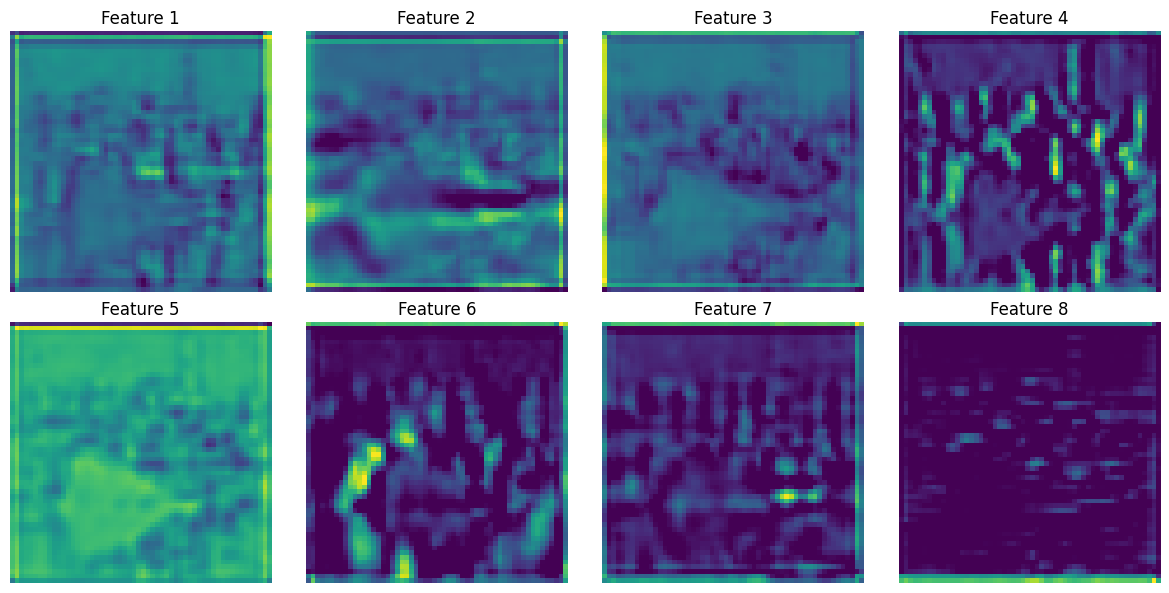

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

model = models.resnet18(pretrained=True)
model.eval()  # Important: inference mode

target_layer = model.layer1

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ResNet
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
image, _ = next(iter(loader))

activation = {}

def hook_fn(module, input, output):
    activation["feature_maps"] = output.detach()

hook_handle = target_layer.register_forward_hook(hook_fn)

_ = model(image)
feature_maps = activation["feature_maps"].squeeze()

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[i].cpu(), cmap='viridis')
    ax.axis('off')
    ax.set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


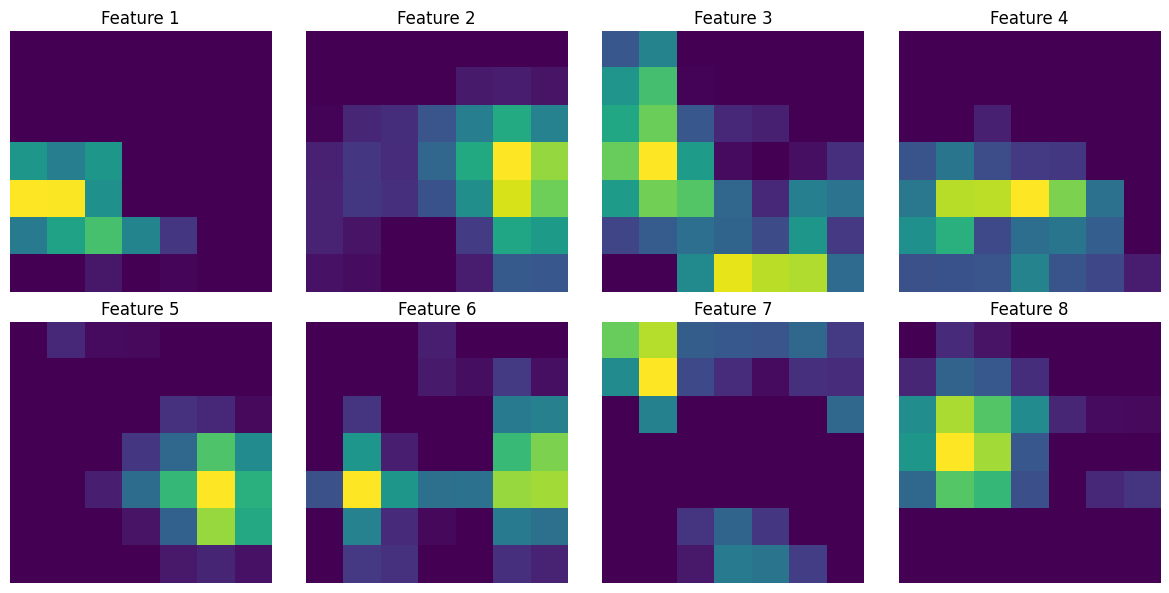

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

# Load pretrained ResNet-18 model
model = models.resnet18(pretrained=True)
model.eval()  # Set to evaluation mode

# 🔁 Change the target layer from layer1 to layer4
target_layer = model.layer4  # << DEEPER layer

# Define preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize input to match ResNet expectations
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Standard normalization
                         std=[0.229, 0.224, 0.225])
])

# Load CIFAR-10 image
dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
image, _ = next(iter(loader))  # Get a random test image

# Register hook to capture feature maps
activation = {}

def hook_fn(module, input, output):
    activation["feature_maps"] = output.detach()

hook_handle = target_layer.register_forward_hook(hook_fn)

# Run forward pass
_ = model(image)

# Extract feature maps
feature_maps = activation["feature_maps"].squeeze()  # shape: [# of channels, H, W]

# Visualize the first 8 feature maps
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[i].cpu(), cmap='viridis')
    ax.axis('off')
    ax.set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

# Clean up the hook
hook_handle.remove()


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 170M/170M [00:01<00:00, 102MB/s]


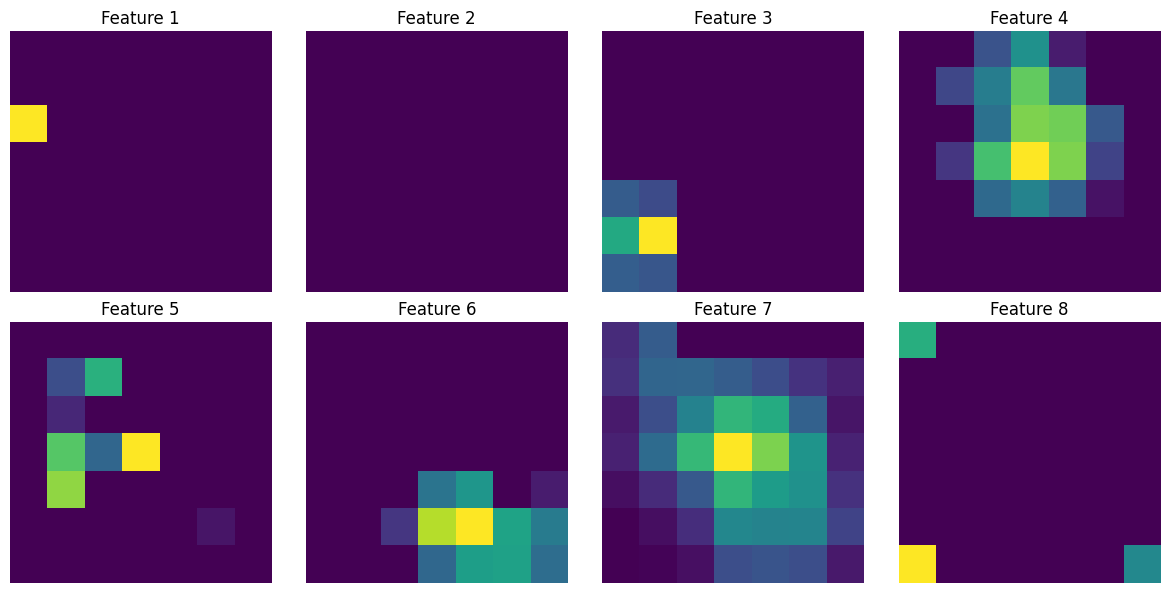

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

model = models.resnet18(pretrained=True)
model.eval()  # Important: inference mode

target_layer = model.layer4

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for ResNet
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)
image, _ = next(iter(loader))

activation = {}

def hook_fn(module, input, output):
    activation["feature_maps"] = output.detach()

hook_handle = target_layer.register_forward_hook(hook_fn)

_ = model(image)
feature_maps = activation["feature_maps"].squeeze()

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[i].cpu(), cmap='viridis')
    ax.axis('off')
    ax.set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()
